In [21]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

Imported our synthetic retail data to our vscode for examination 

In [22]:
url="C:\Git Portfolio\synthetic_retail_data.csv"
data=pd.read_csv(url)
print(data)

      InvoiceNo CustomerID        Date ProductCategory  Quantity  UnitPrice  \
0     INV105646   CUST1810    1/1/2023            Home         7      67.88   
1     INV105099   CUST1530    1/1/2023            Toys         6      24.22   
2     INV102818   CUST1701    1/1/2023     Electronics         6     158.78   
3     INV107351   CUST1323    1/1/2023     Electronics         5     102.23   
4     INV108415   CUST1406    1/1/2023     Electronics         8      62.32   
...         ...        ...         ...             ...       ...        ...   
9495  INV100053   CUST1389  12/31/2023            Home         4      72.71   
9496  INV101382   CUST1766  12/31/2023        Clothing        12      33.46   
9497  INV102113   CUST1408  12/31/2023            Toys        13      36.85   
9498  INV107462   CUST1472  12/31/2023            Home         6      81.49   
9499  INV106123   CUST1275  12/31/2023            Home         7      43.86   

      DiscountApplied  ReviewRating  IsFirstPurchas

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\pc\AppData\Local\Temp\ipykernel_19436\2671732637.py:1: SyntaxWarning: invalid escape sequence '\G'
  url="C:\Git Portfolio\synthetic_retail_data.csv"


In [23]:
print(data.describe())
print(data.shape)

          Quantity    UnitPrice  DiscountApplied  ReviewRating  \
count  9500.000000  9500.000000      9500.000000   7835.000000   
mean      9.166105    58.459586        18.181400      3.481302   
std       5.267773    42.140771        18.531475      1.062269   
min       1.000000    10.060000         0.000000      1.000000   
25%       6.000000    31.350000         0.000000      3.000000   
50%       9.000000    43.675000        13.600000      4.000000   
75%      11.000000    73.660000        34.800000      4.000000   
max      80.000000   672.400000        55.000000      5.000000   

       IsFirstPurchase   TimeOnSite  ShippingCost  ItemsInCart  \
count      9500.000000  9025.000000   9500.000000  9500.000000   
mean          0.302842   299.567878     10.041306     9.671474   
std           0.459512   118.555281      4.875580     3.528830   
min           0.000000    30.000000      0.000000     1.000000   
25%           0.000000   218.900000      6.630000     7.000000   
50%      

Identifing missing values

In [24]:
print(data.isnull().sum())

InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
Unnamed: 17         9500
Unnamed: 18         8271
Unnamed: 19         9500
Unnamed: 20         8271
Unnamed: 21         8271
Unnamed: 22         8271
dtype: int64


 1.apply appropriate treatment

In [25]:
data.drop(['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19','Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], axis=1, inplace=True, errors='ignore')
data['ReviewRating'].fillna(data['ReviewRating'].median(),inplace=True)
data['MarketingChannel'].fillna(data['MarketingChannel'].mode()[0], inplace=True)
data['TimeOnSite'].fillna(data['TimeOnSite'].median(),inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_19436\4177104954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ReviewRating'].fillna(data['ReviewRating'].median(),inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_19436\4177104954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

After Remove/Drop empty or meaningless columns 
and fill in the 'ReviewRating' with median b/c it numerical column
and fill in the 'MarketingChannel' with mode b/c it categorical

In [26]:
print(data.isnull().sum())

InvoiceNo           0
CustomerID          0
Date                0
ProductCategory     0
Quantity            0
UnitPrice           0
DiscountApplied     0
ReviewRating        0
IsFirstPurchase     0
MarketingChannel    0
Country             0
TimeOnSite          0
ShippingCost        0
ItemsInCart         0
PreviousSpending    0
BrowsingSessions    0
TotalAmount         0
dtype: int64


Detect outliers

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)


Index(['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating',
       'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart',
       'PreviousSpending', 'BrowsingSessions', 'TotalAmount'],
      dtype='object')


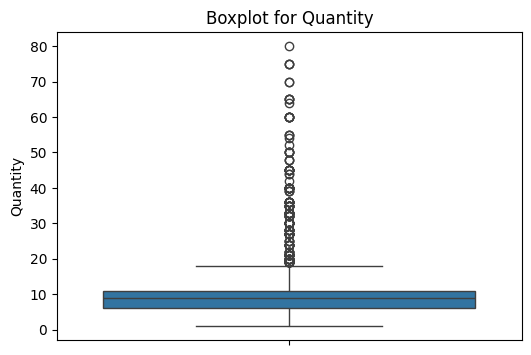

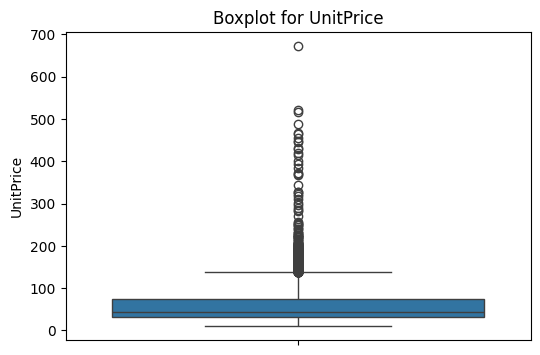

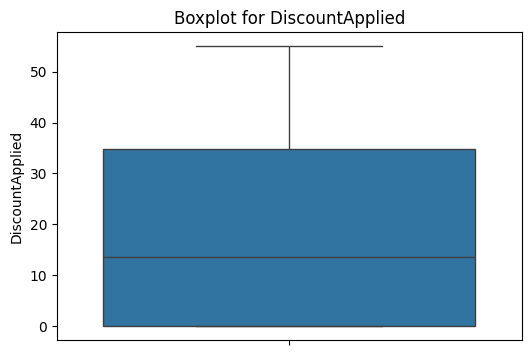

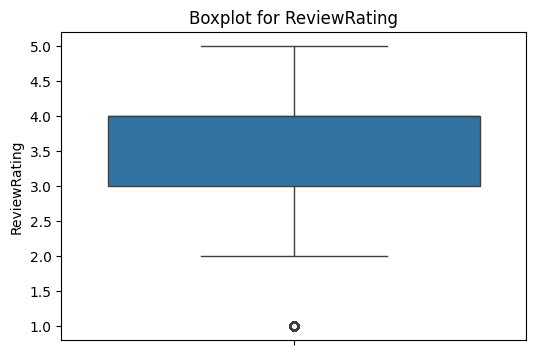

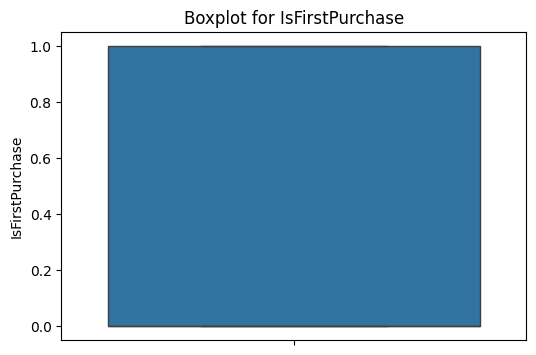

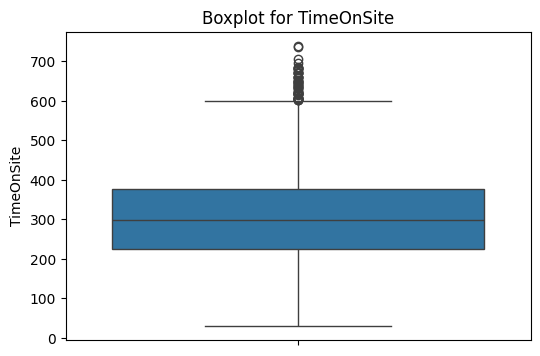

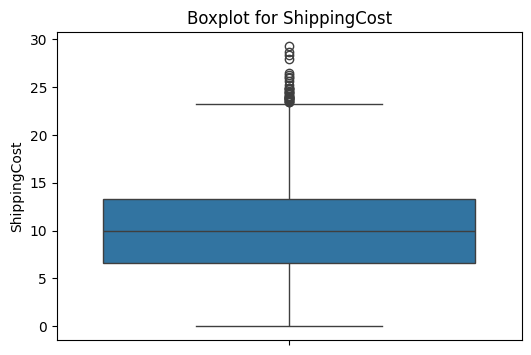

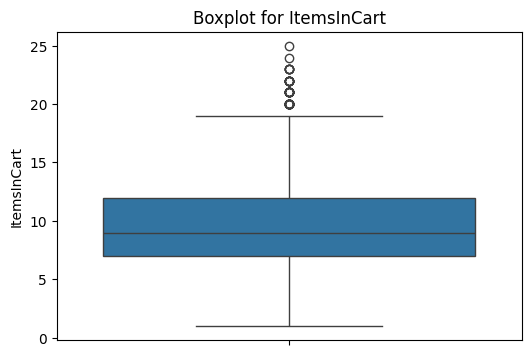

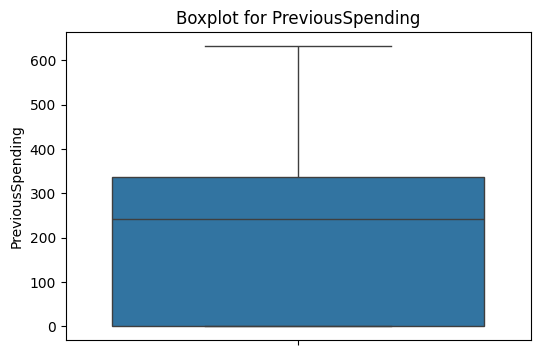

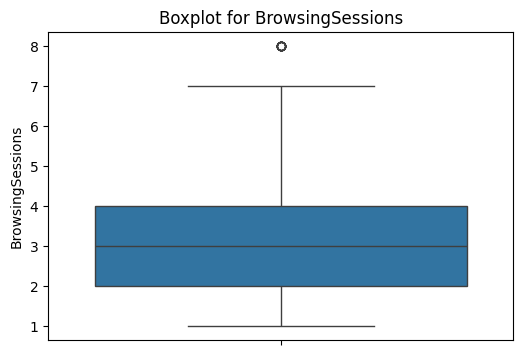

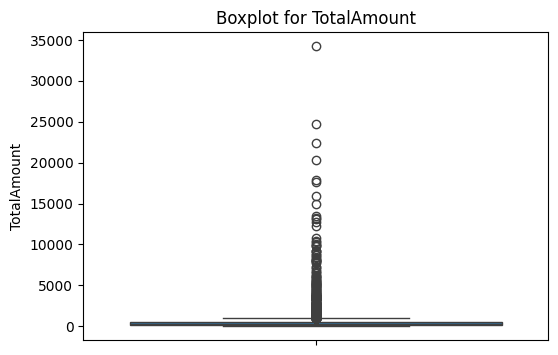

In [28]:
# Loop through each numeric column and plot individually
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


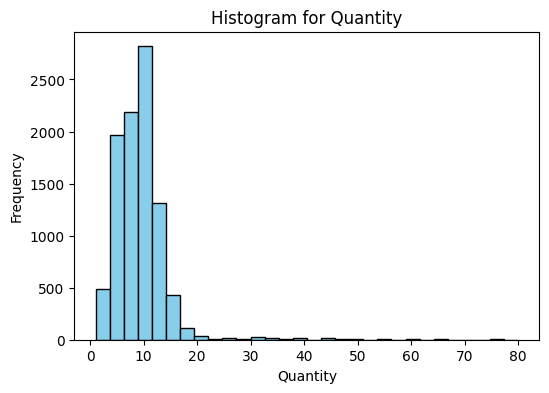

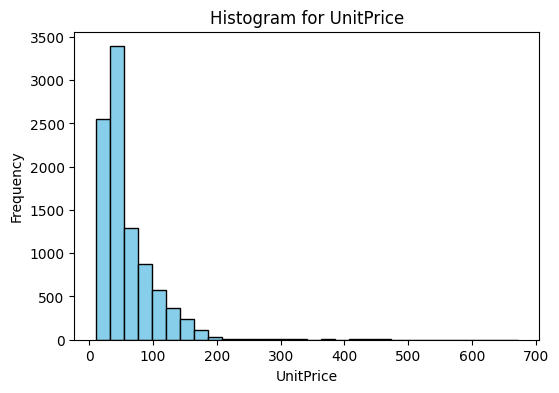

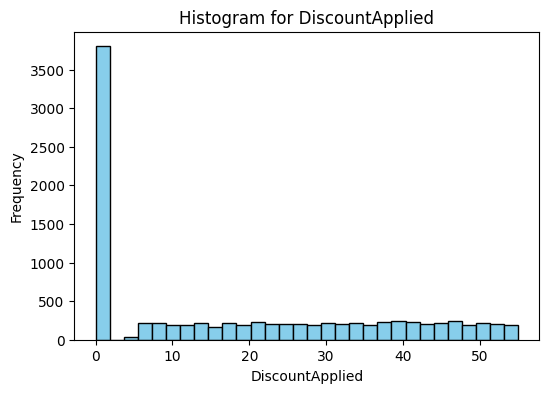

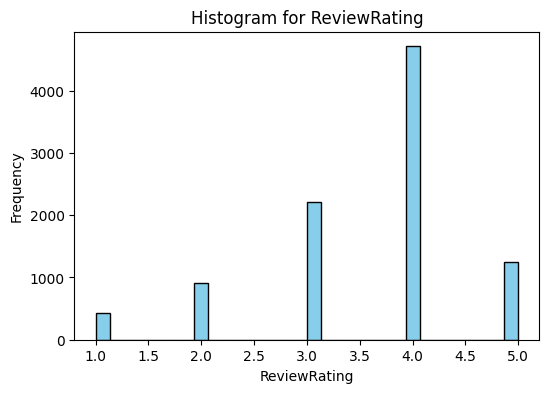

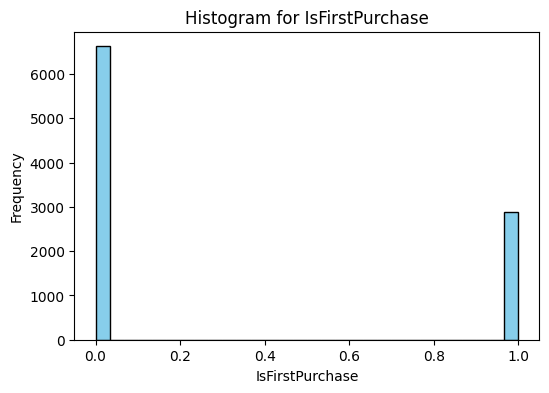

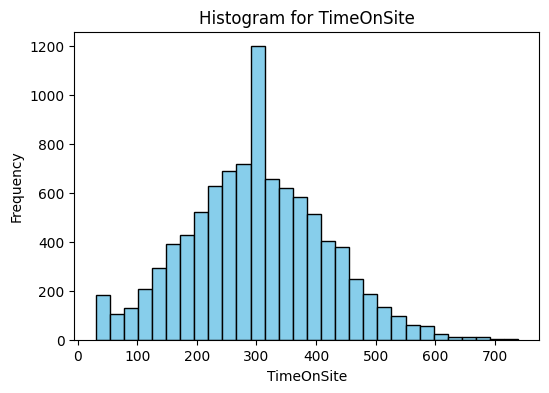

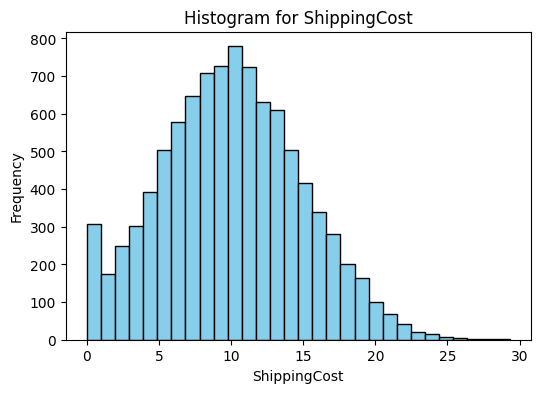

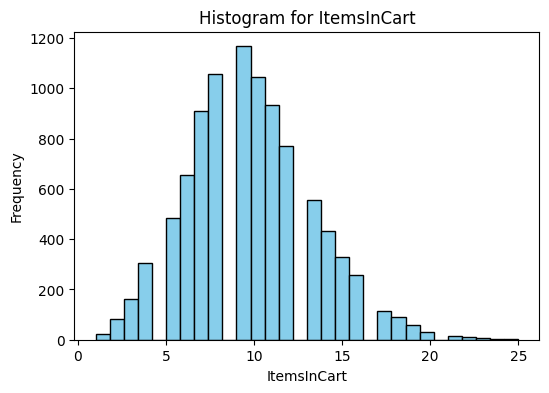

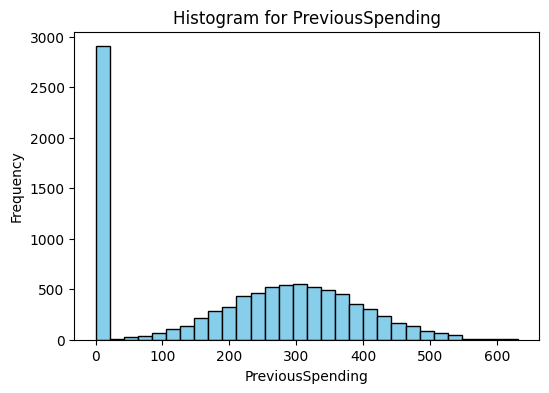

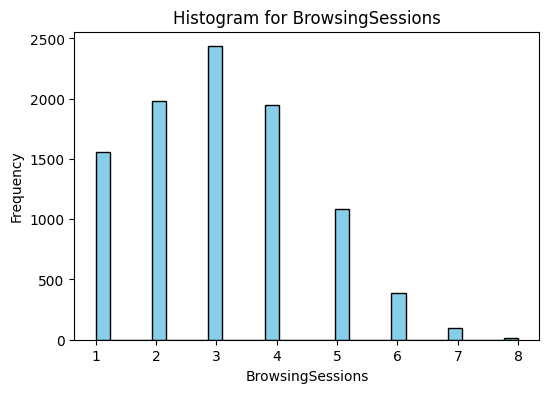

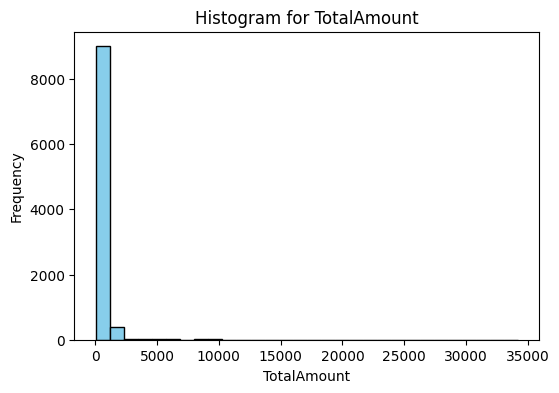

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Removing Outliers

In [30]:

data_no_outliers = data.copy()

for col in numeric_cols:
    Q1 = data_no_outliers[col].quantile(0.25)
    Q3 = data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2 * IQR
    upper = Q3 + 2 * IQR
    data_no_outliers = data_no_outliers[(data_no_outliers[col] >= lower) & (data_no_outliers[col] <= upper)]
print(data_no_outliers)


      InvoiceNo CustomerID        Date ProductCategory  Quantity  UnitPrice  \
0     INV105646   CUST1810    1/1/2023            Home         7      67.88   
1     INV105099   CUST1530    1/1/2023            Toys         6      24.22   
3     INV107351   CUST1323    1/1/2023     Electronics         5     102.23   
4     INV108415   CUST1406    1/1/2023     Electronics         8      62.32   
5     INV108351   CUST1080    1/1/2023            Toys        10      23.47   
...         ...        ...         ...             ...       ...        ...   
9495  INV100053   CUST1389  12/31/2023            Home         4      72.71   
9496  INV101382   CUST1766  12/31/2023        Clothing        12      33.46   
9497  INV102113   CUST1408  12/31/2023            Toys        13      36.85   
9498  INV107462   CUST1472  12/31/2023            Home         6      81.49   
9499  INV106123   CUST1275  12/31/2023            Home         7      43.86   

      DiscountApplied  ReviewRating  IsFirstPurchas

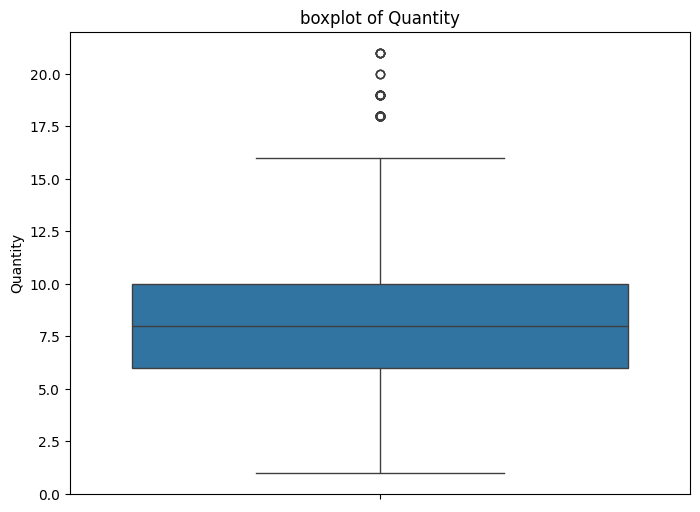

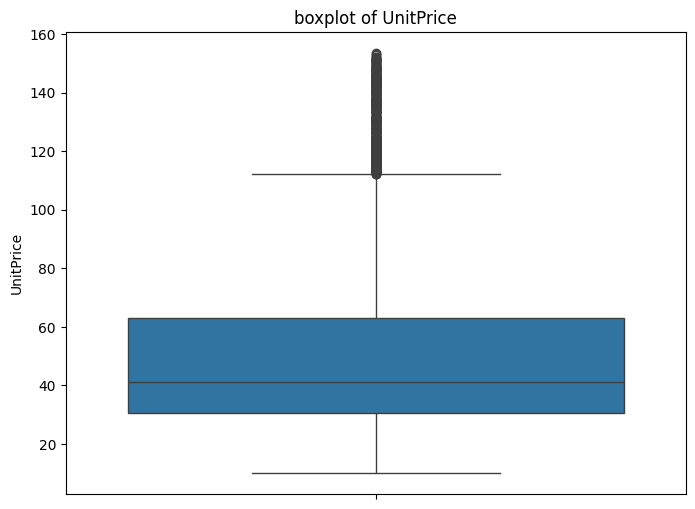

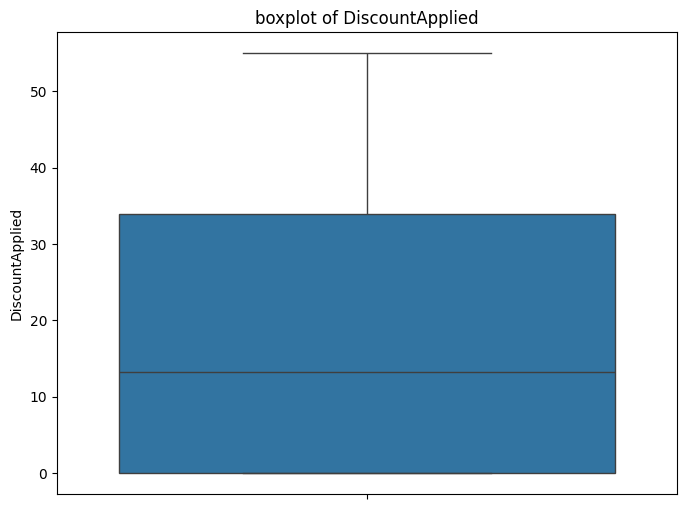

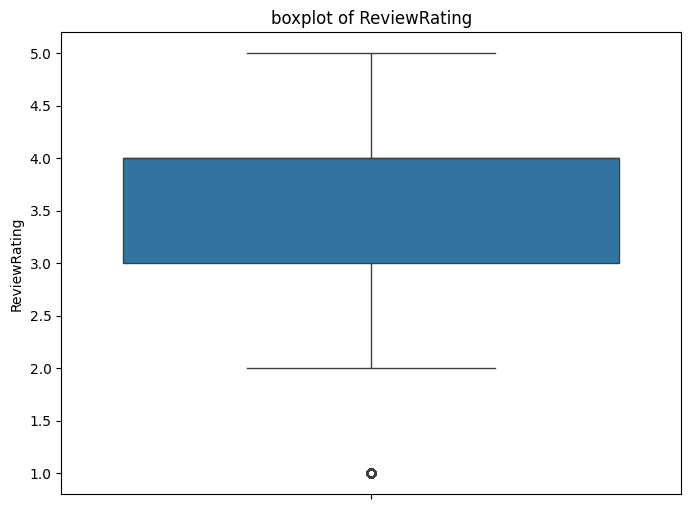

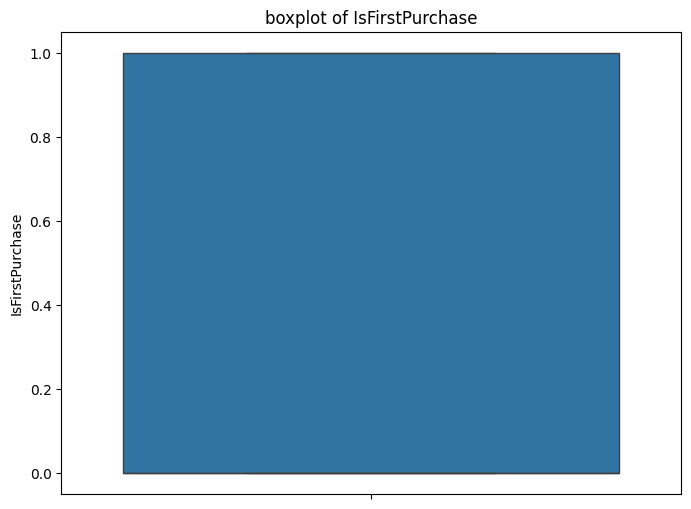

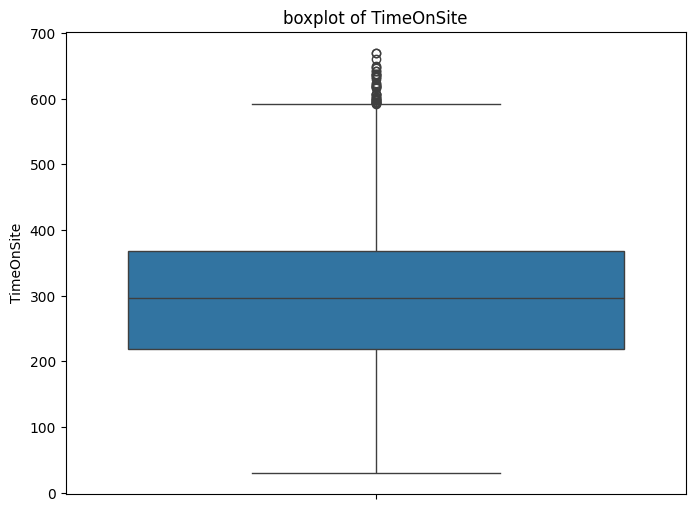

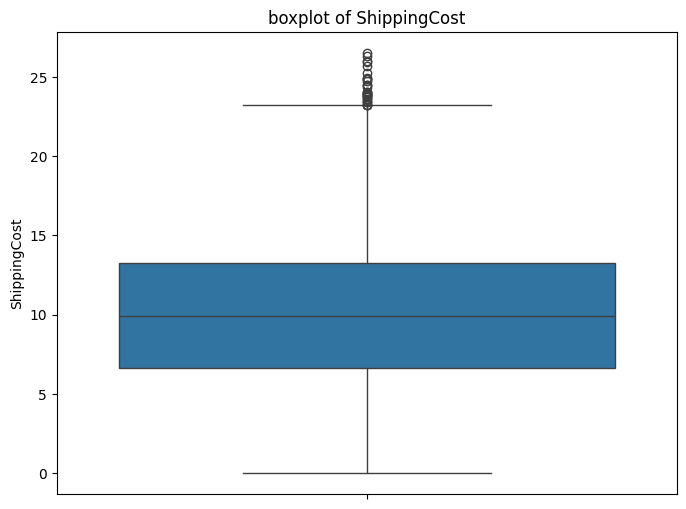

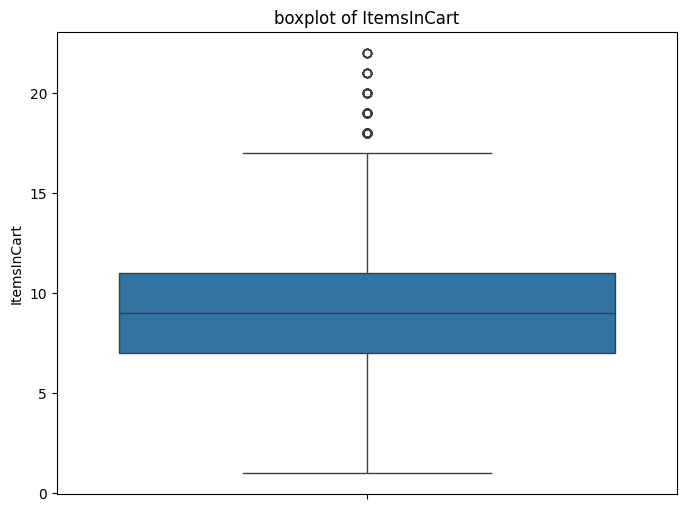

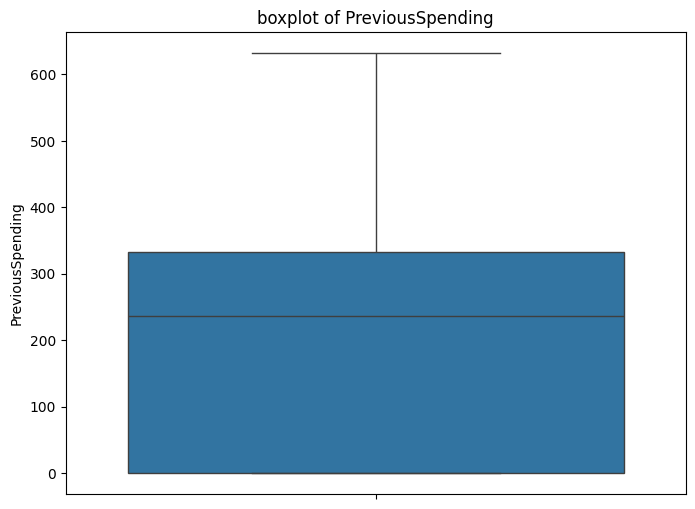

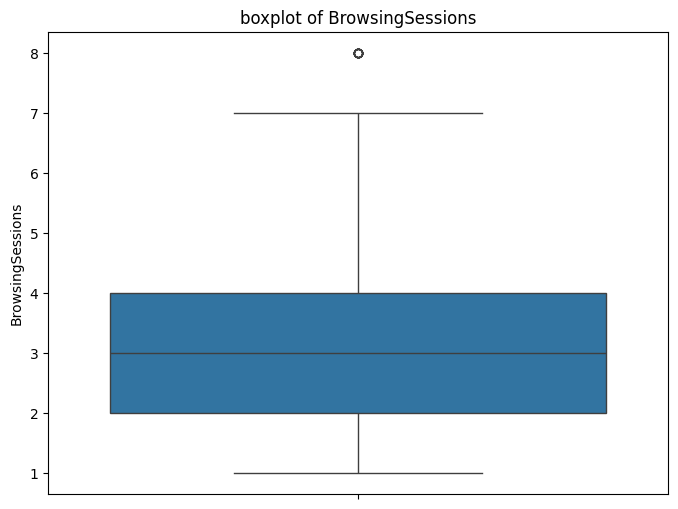

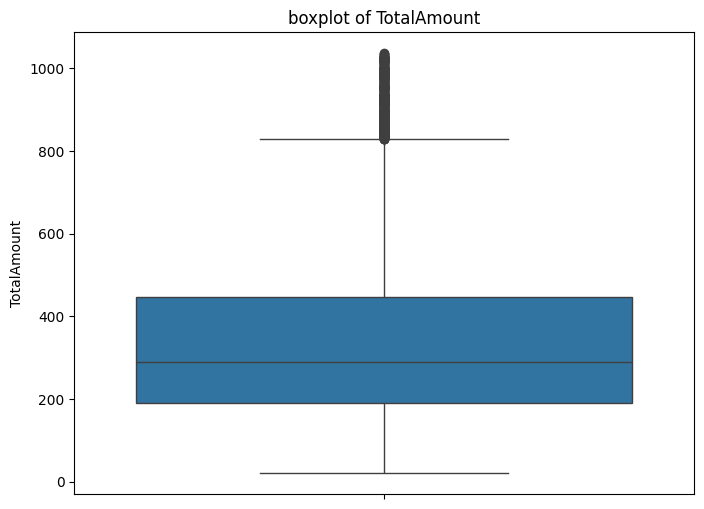

In [31]:
for col in numeric_cols:
   plt.figure(figsize=(8,6))
   sns.boxplot(y=data_no_outliers[col])
   plt.title(f'boxplot of {col}')
   plt.show()

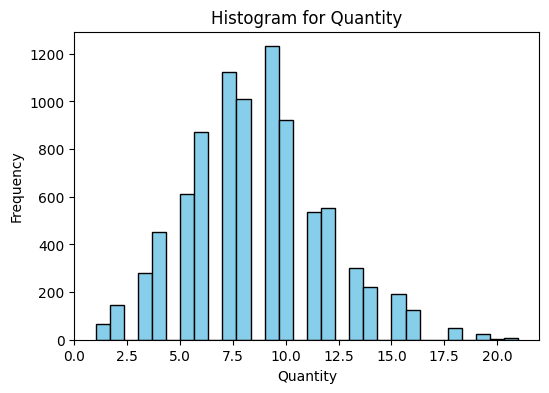

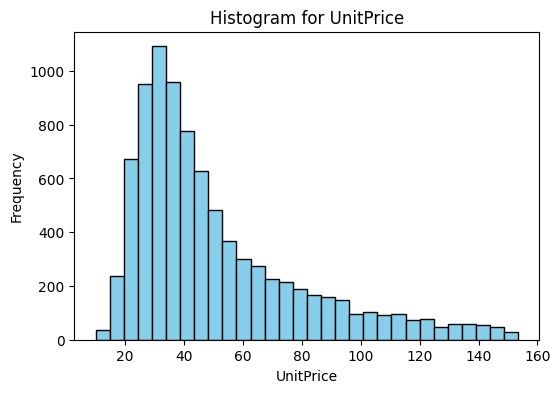

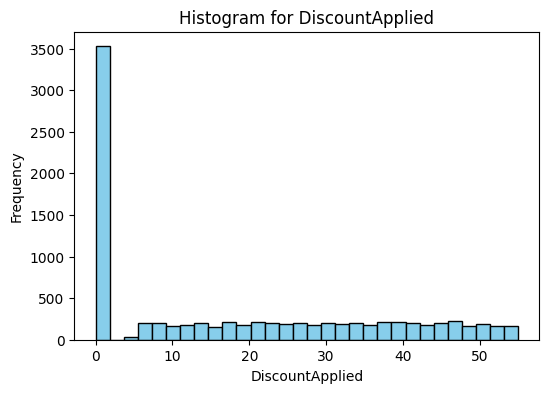

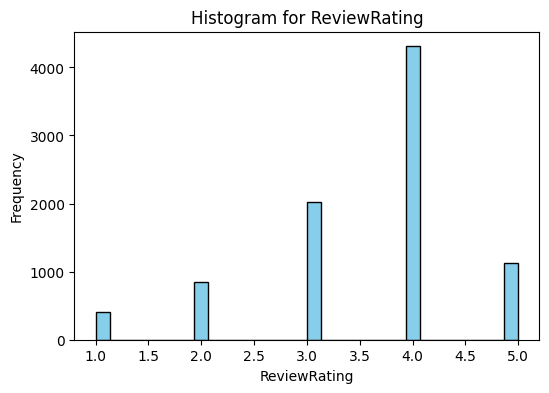

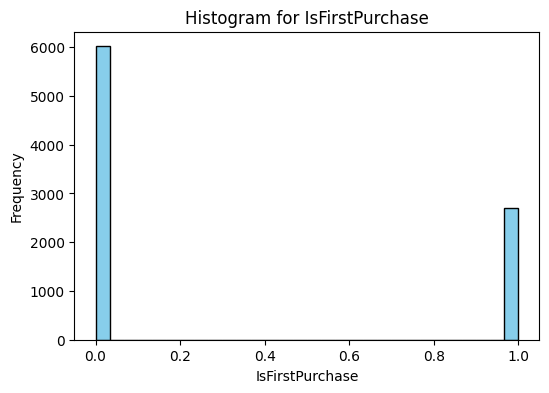

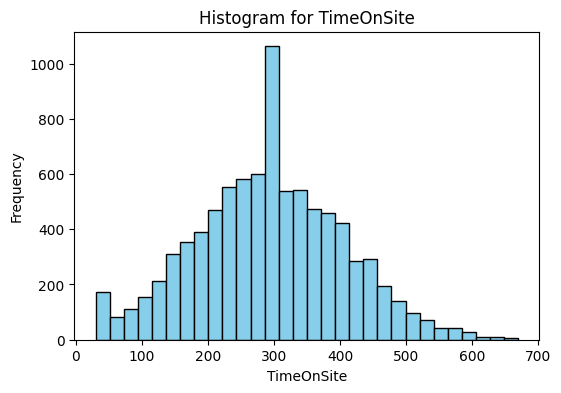

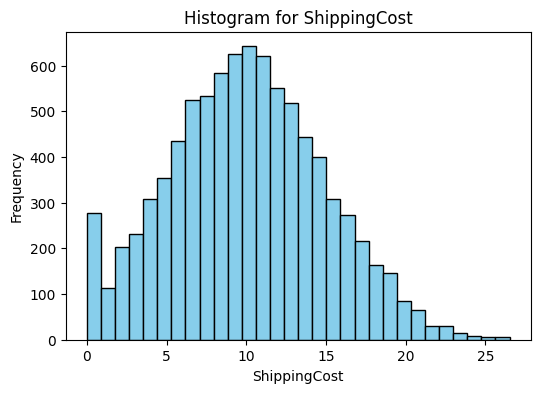

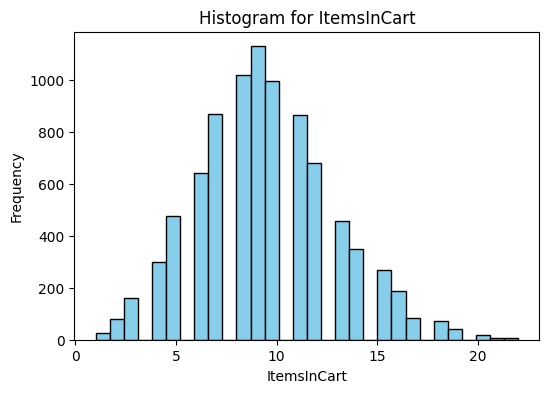

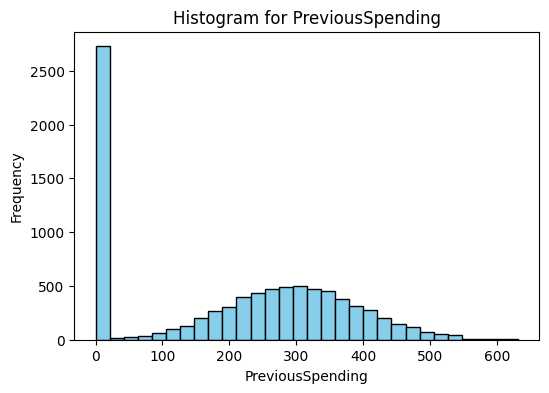

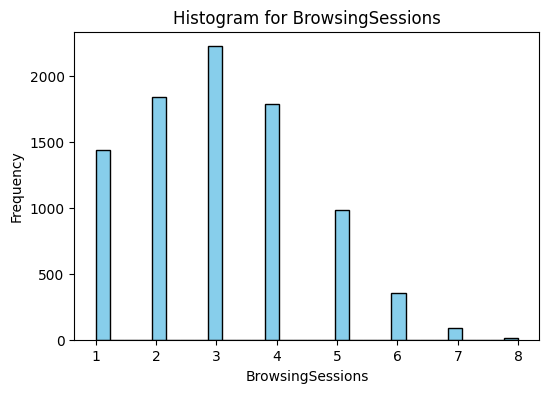

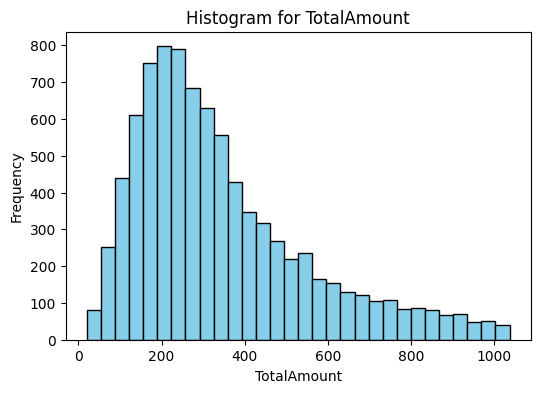

In [41]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(data_no_outliers[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()